**<h2> MADS: Milestone II (Team 10) - Sensitivity Analysis and Failure Analysis</h2>**
<h3> Topic: Machine learning on duty: solving consumer complaints and improving satisfaction!</h3>
<h4> Authors: Chih-Han Yeh (yehch), Yi-Hsin Chien (yihsinc), Weiming Chen ( weimingc) </h4>
<h4> Mentor: Alexis Castellanos</h4>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Environment Setting
Importing libraries we need for our project.

In [ ]:
!pip install keras
!pip install catboost
!pip install scikeras[tensorflow]
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  A

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from sklearn import metrics
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
# Built-in libraries
import re
import string
import warnings

# Third-party libraries for data handling and processing
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from tqdm import tqdm

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import KeyedVectors

# Pre-processing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, MaxAbsScaler
from imblearn.over_sampling import SMOTE

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Machine Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, LSTM
from keras.callbacks import EarlyStopping

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


# Miscellaneous
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tqdm.pandas()
warnings.filterwarnings("ignore")

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Loading preprocessed dataset for saving computing power


In [ ]:
X = pd.read_hdf('/content/drive/MyDrive/milestone II/X.h5', 'X_p')

In [ ]:
y = pd.read_hdf('/content/drive/MyDrive/milestone II/y.h5', 'y_p')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [ ]:
clf = CatBoostClassifier(random_state=42)

use halvinggridsearchCV instead of GridSearchCV to improve efficiency

In [ ]:
#use halvinggridsearchCV instead of GridSearchCV to improve efficiency
param_grid = {
    'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1],
    'depth': [1,3,5,7,9]

}
search = HalvingGridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1_macro', factor=2, random_state=42)

search.fit(X_train, y_train)


Streaming output truncated to the last 5000 lines.
0:	learn: 0.6803508	total: 170ms	remaining: 2m 50s
1:	learn: 0.6726165	total: 313ms	remaining: 2m 36s
2:	learn: 0.6659619	total: 452ms	remaining: 2m 30s
3:	learn: 0.6599839	total: 594ms	remaining: 2m 27s
4:	learn: 0.6527559	total: 739ms	remaining: 2m 27s
5:	learn: 0.6479712	total: 880ms	remaining: 2m 25s
6:	learn: 0.6439086	total: 1.02s	remaining: 2m 24s
7:	learn: 0.6401598	total: 1.17s	remaining: 2m 24s
8:	learn: 0.6370184	total: 1.32s	remaining: 2m 25s
9:	learn: 0.6339208	total: 1.46s	remaining: 2m 24s
10:	learn: 0.6311256	total: 1.6s	remaining: 2m 23s
11:	learn: 0.6279201	total: 1.73s	remaining: 2m 22s
12:	learn: 0.6255167	total: 1.87s	remaining: 2m 22s
13:	learn: 0.6230115	total: 2.01s	remaining: 2m 21s
14:	learn: 0.6127331	total: 2.15s	remaining: 2m 21s
15:	learn: 0.6106986	total: 2.3s	remaining: 2m 21s
16:	learn: 0.6032179	total: 2.44s	remaining: 2m 20s
17:	learn: 0.6013907	total: 2.58s	remaining: 2m 20s
18:	learn: 0.5995572	tota

HalvingGridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f566abad2d0>,
                    factor=2,
                    param_grid={'depth': [1, 3, 5, 7, 9],
                                'learning_rate': [0.02, 0.04, 0.06, 0.08, 0.1]},
                    random_state=42, scoring='f1_macro')

In [ ]:
# get the best params and score
print("Best Parameters: ", search.best_params_)
print("Best Score: ", search.best_score_)

# 使predict with the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

# check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Best Parameters:  {'depth': 7, 'learning_rate': 0.1}
Best Score:  0.8209117556967664
Accuracy:  0.8249155616712535


In [ ]:

print("Best Score: ", search.best_params_)
print(search.best_estimator_)
print(search.best_estimator_)

Best Score:  {'depth': 7, 'learning_rate': 0.1}


## Plot the sensitivity analysis for the hyperparameter tunning

In [ ]:
df_search = pd.DataFrame(search.cv_results_)

NameError: ignored

In [ ]:
df_search

In [ ]:
a = df_search['param_depth'].tolist()
b = df_search['param_learning_rate'].tolist()
c = df_search['mean_test_score'].tolist()

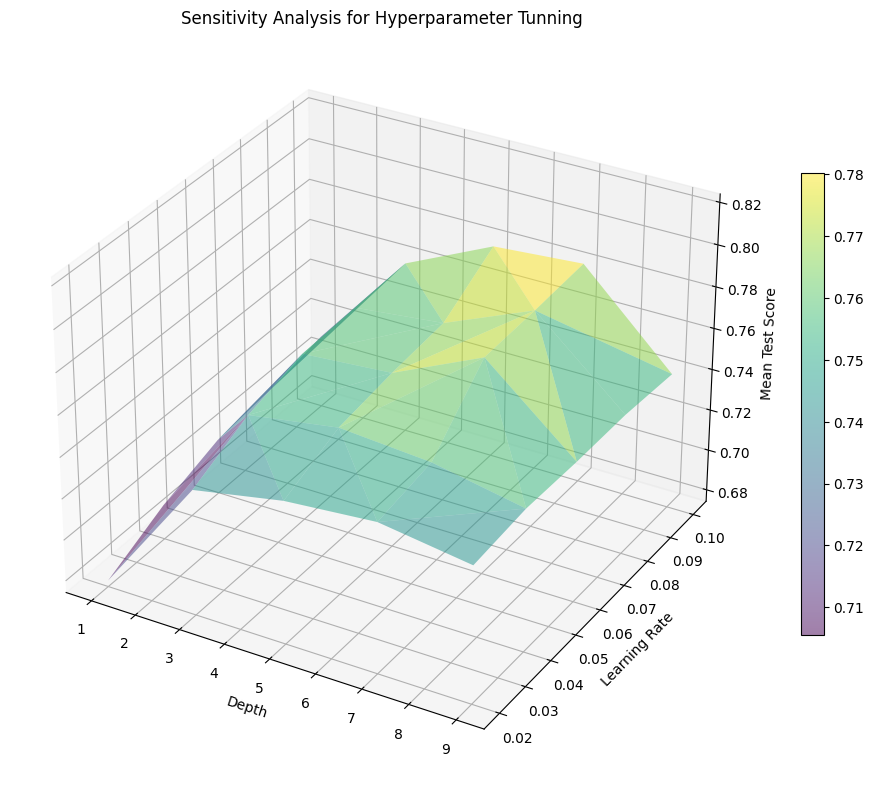

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
p = ax.plot_trisurf(a, b, c, cmap='viridis', edgecolor='none', shade=True, antialiased=True, alpha=0.5)

ax.set_xlabel('Depth')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Mean Test Score')
ax.set_title('Sensitivity Analysis for Hyperparameter Tunning')
fig.colorbar(p, ax=ax, shrink=0.6)
plt.show()

In [ ]:
df_search.to_csv('/content/drive/MyDrive/milestone II/search.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/milestone II/search_s.xlsx')
df

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_learning_rate,params,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,11990,7.326387,1.088347,0.249799,0.138902,1,0.02,"{'depth': 1, 'learning_rate': 0.02}",0.677216,0.006893,51,0.698442,0.695398,0.707797,0.697913,0.701258,0.700162,0.004248
1,0,11990,6.596357,0.140540,0.317725,0.172531,1,0.04,"{'depth': 1, 'learning_rate': 0.04}",0.691120,0.005060,50,0.714932,0.715416,0.724067,0.720144,0.720659,0.719044,0.003439
2,0,11990,6.667486,0.262329,0.325718,0.175032,1,0.06,"{'depth': 1, 'learning_rate': 0.06}",0.700834,0.002358,49,0.728885,0.729033,0.734895,0.732670,0.733456,0.731788,0.002418
3,0,11990,6.732968,0.205276,0.315093,0.171617,1,0.08,"{'depth': 1, 'learning_rate': 0.08}",0.704166,0.002856,48,0.743231,0.740864,0.749490,0.743612,0.749353,0.745310,0.003487
4,0,11990,6.686143,0.153672,0.314730,0.170228,1,0.10,"{'depth': 1, 'learning_rate': 0.1}",0.709899,0.005597,47,0.754344,0.751001,0.751480,0.752004,0.754054,0.752577,0.001365
5,0,11990,13.144961,0.248224,0.250950,0.146076,3,0.02,"{'depth': 3, 'learning_rate': 0.02}",0.734914,0.004066,46,0.789594,0.786934,0.788015,0.787714,0.786885,0.787829,0.000985
6,0,11990,13.261211,0.302285,0.330929,0.171766,3,0.04,"{'depth': 3, 'learning_rate': 0.04}",0.748205,0.004408,38,0.845155,0.842472,0.845448,0.844417,0.845981,0.844695,0.001221
7,0,11990,13.771814,0.390462,0.259761,0.139409,3,0.06,"{'depth': 3, 'learning_rate': 0.06}",0.755987,0.007666,32,0.884160,0.884020,0.887283,0.887701,0.884271,0.885487,0.001644
8,0,11990,13.473042,0.340083,0.252402,0.145499,3,0.08,"{'depth': 3, 'learning_rate': 0.08}",0.757458,0.003735,30,0.913565,0.912615,0.914399,0.914710,0.914616,0.913981,0.000793
9,0,11990,13.658738,0.088579,0.257104,0.150697,3,0.10,"{'depth': 3, 'learning_rate': 0.1}",0.758751,0.001258,29,0.933688,0.935351,0.937337,0.936503,0.936822,0.935940,0.001301


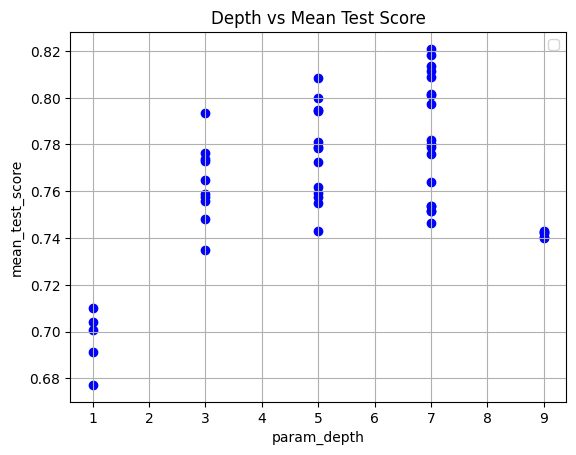

In [ ]:
a = df['param_depth'].tolist()
b = df['param_learning_rate'].tolist()
c = df['mean_test_score'].tolist()


plt.scatter(a, c, marker='o', color='b')

# Add title and labels
plt.title("Depth vs Mean Test Score")
plt.xlabel("param_depth")
plt.ylabel("mean_test_score")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

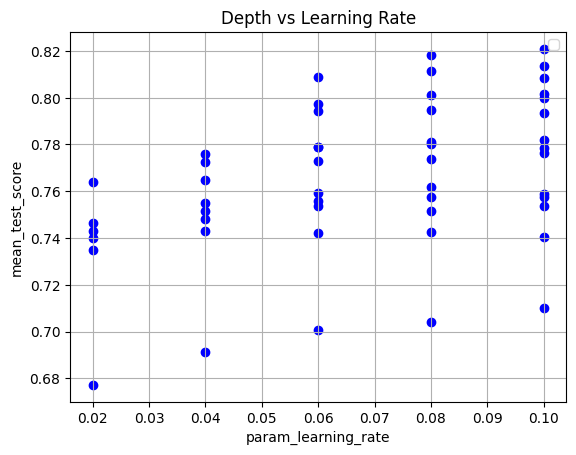

In [29]:
plt.scatter(b, c, marker='o', color='b')

# Add title and labels
plt.title("Depth vs Learning Rate")
plt.xlabel("param_learning_rate")
plt.ylabel("mean_test_score")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

**Using the best hyperparameters to predict test data and conduct failure analysis**

In [ ]:
clf = CatBoostClassifier(random_state=42, depth = 7, learning_rate = 0.1)
clf.fit(X_train, y_train)

0:	learn: 0.6804344	total: 295ms	remaining: 4m 55s
1:	learn: 0.6731407	total: 438ms	remaining: 3m 38s
2:	learn: 0.6663955	total: 586ms	remaining: 3m 14s
3:	learn: 0.6584835	total: 728ms	remaining: 3m 1s
4:	learn: 0.6533750	total: 865ms	remaining: 2m 52s
5:	learn: 0.6487278	total: 1s	remaining: 2m 46s
6:	learn: 0.6445411	total: 1.14s	remaining: 2m 42s
7:	learn: 0.6407703	total: 1.28s	remaining: 2m 38s
8:	learn: 0.6375525	total: 1.42s	remaining: 2m 36s
9:	learn: 0.6346791	total: 1.56s	remaining: 2m 34s
10:	learn: 0.6312101	total: 1.71s	remaining: 2m 33s
11:	learn: 0.6285123	total: 1.84s	remaining: 2m 31s
12:	learn: 0.6258517	total: 1.98s	remaining: 2m 30s
13:	learn: 0.6232860	total: 2.12s	remaining: 2m 29s
14:	learn: 0.6211671	total: 2.27s	remaining: 2m 28s
15:	learn: 0.6189254	total: 2.42s	remaining: 2m 28s
16:	learn: 0.6091141	total: 2.59s	remaining: 2m 29s
17:	learn: 0.6016610	total: 2.74s	remaining: 2m 29s
18:	learn: 0.5992628	total: 2.89s	remaining: 2m 29s
19:	learn: 0.5975380	total

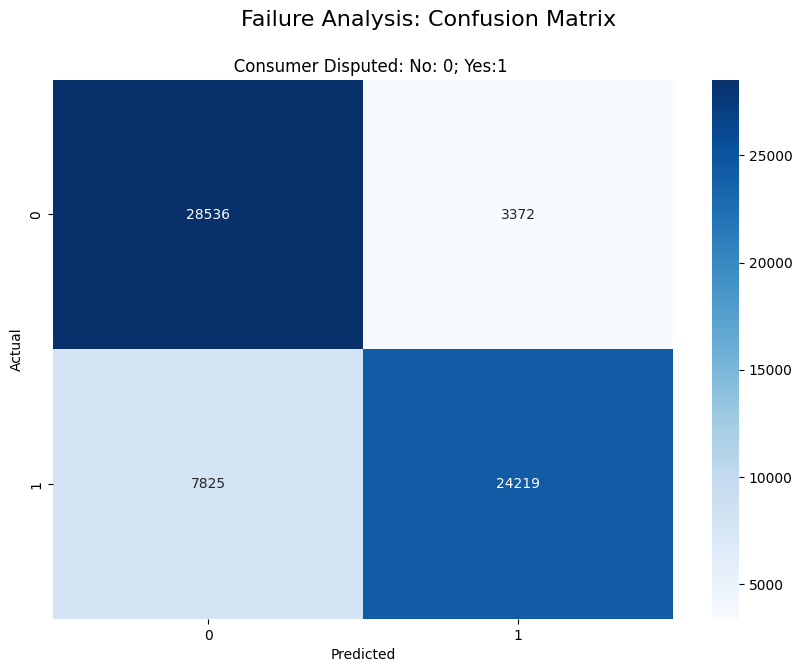

In [ ]:
predictions = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)

# confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.suptitle('Failure Analysis: Confusion Matrix', ha='center', fontsize=16)
plt.title('   Consumer Disputed: No: 0; Yes:1', ha='center', fontsize=12)
plt.show()

In [ ]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.89      0.84     31908
           1       0.88      0.76      0.81     32044

    accuracy                           0.82     63952
   macro avg       0.83      0.83      0.82     63952
weighted avg       0.83      0.82      0.82     63952

